In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as Line2D

In [64]:
# Load ttc streetcar delay dataset
ttc_data = pd.read_csv("ttc-streetcar-delay-data-2024_cleaned.csv")

In [65]:
# Sort categories by ascending mean
mean_order = ttc_data.groupby('Incident')['Min Delay'].mean().sort_values().index

# Compute means for each category
means = ttc_data.groupby('Incident')['Min Delay'].mean()

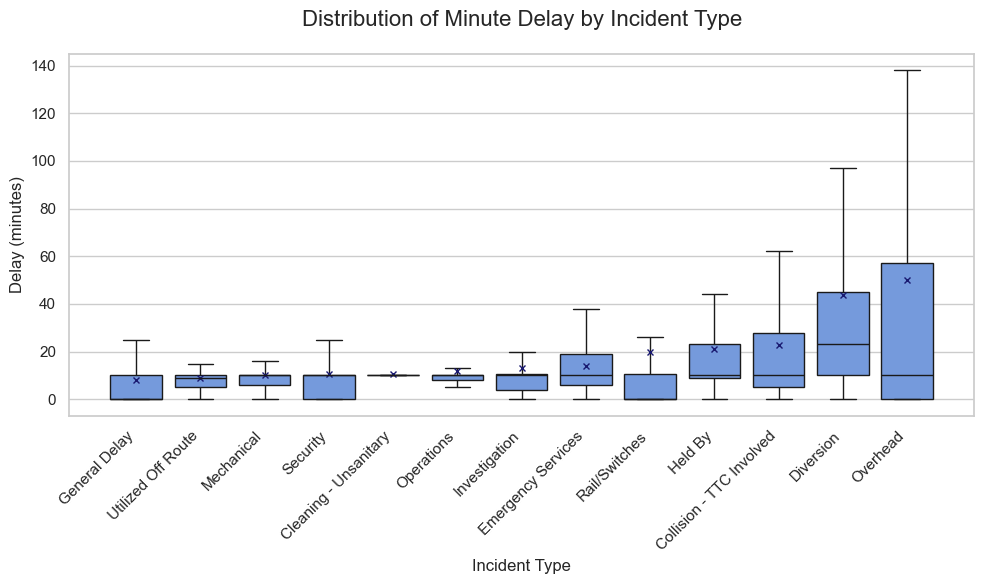

In [ ]:
# Create box plot and order by mean ascending
plt.figure(figsize=(10, 6))
sns.boxplot(x="Incident", y="Min Delay", data=ttc_data, order=mean_order, 
            showfliers=False, color="cornflowerblue", linewidth=1, linecolor='k')

# Plot means
for i, cat in enumerate(mean_order):
    plt.plot(i, means[cat], marker='x', color='midnightblue', 
             markersize=5, label='Mean' if i == 0 else "")

# Customize labels and title
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Minute Delay by Incident Type", fontsize= 16, pad=20)
plt.xlabel("Incident Type", fontsize = 12)
plt.ylabel("Delay (minutes)", fontsize = 12)
plt.plot()

plt.tight_layout()
plt.show()

In [ ]:
# Make sure Date column is in pandas datetime format
ttc_data["Date"] = pd.to_datetime(ttc_data["Date"])

# Group by date and sum delay minutes
daily_delay = ttc_data.groupby("Date")["Min Delay"].sum().reset_index()
daily_delay

C:\Users\natas\AppData\Local\Temp\ipykernel_3748\2462943862.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ttc_data["Date"] = pd.to_datetime(ttc_data["Date"])


,Date,Min Delay
0,2024-01-01,813.0
1,2024-01-02,403.0
2,2024-01-03,674.0
3,2024-01-04,388.0
4,2024-01-05,599.0
...,...,...
361,2024-12-27,603.0
362,2024-12-28,343.0
363,2024-12-29,456.0
364,2024-12-30,419.0


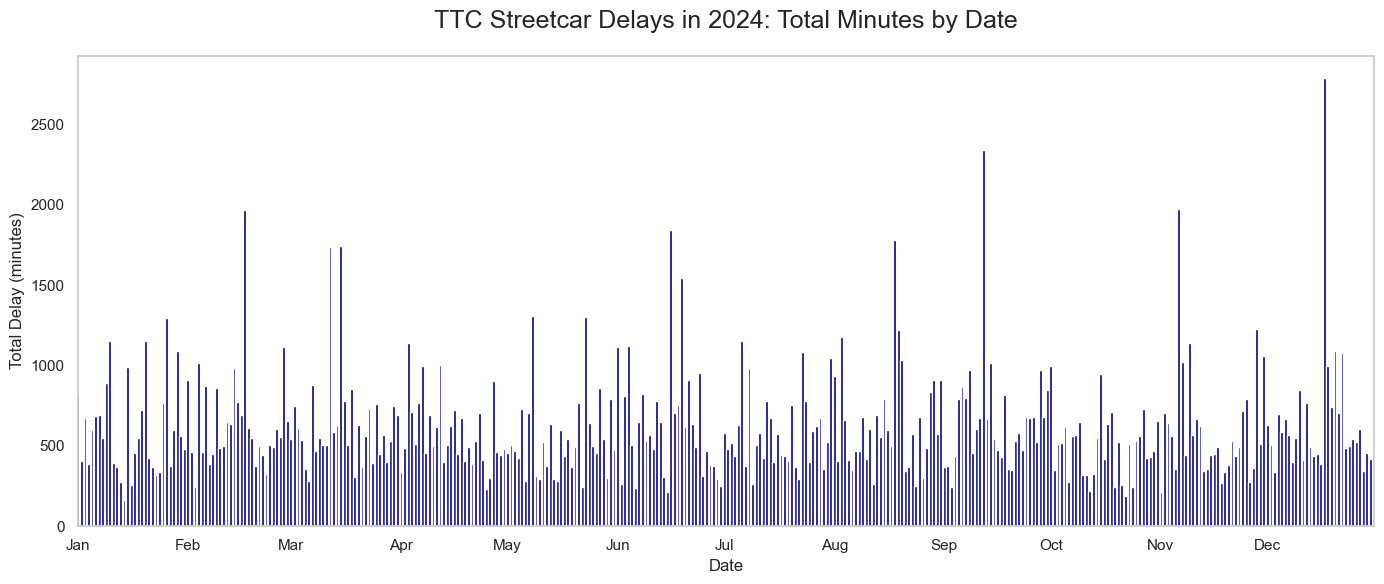

In [68]:
# Plot as column chart
fig, ax = plt.subplots(figsize=(14, 6))
plt.bar(daily_delay["Date"], daily_delay["Min Delay"], color="navy", alpha=1.0)

# Customize plot
plt.title("TTC Streetcar Delays in 2024: Total Minutes by Date", fontsize = 18, pad=20)
plt.xlabel("Date", fontsize= 12)
plt.ylabel("Total Delay (minutes)", fontsize = 12)

# Format x-axis: monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0)

# Set x-axis limits: Jan to Dec
start_date = pd.Timestamp(daily_delay["Date"].min().year, 1, 1)
end_date = pd.Timestamp(daily_delay["Date"].min().year, 12, 31)
ax.set_xlim(start_date, end_date)


plt.grid(None)
plt.tight_layout()
plt.show()
